# UNIT 1 FINAL ROUND

## Problem (case study)

In [1]:
# The dataset contains 24 columns of customer data for an insurance company.

In [2]:
# Our goal is to build a model that can predict the total claim amount based on the customer data

## Getting Data

In [3]:
# Libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("marketing_customer_analysis.csv")

## Cleaning/Wrangling/EDA

In [5]:
# Some Data Exploration
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
print(df.shape)

(9134, 24)


Change headers names

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
print(df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


Deal with NaN values

In [9]:
print(df.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


Categorical Features

In [10]:
categorical = df.select_dtypes(include=['object'])
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Numerical Features

In [11]:
numerical = df.select_dtypes(include=['float64', 'int64'])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Exploration

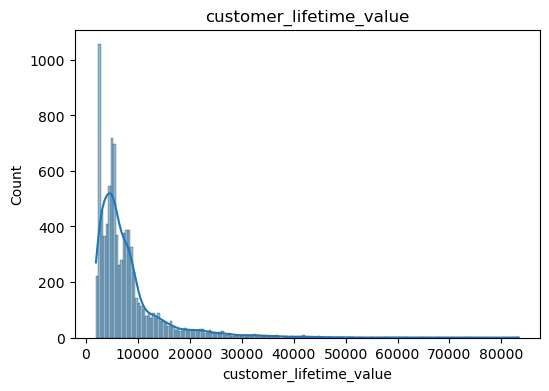

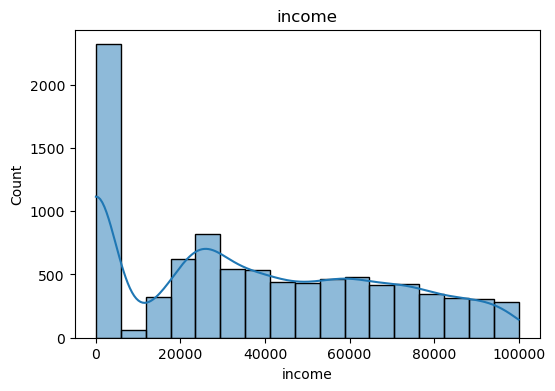

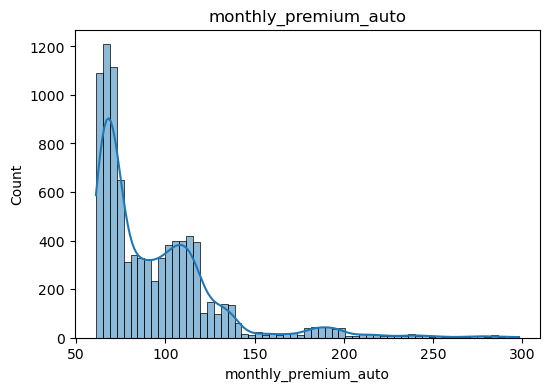

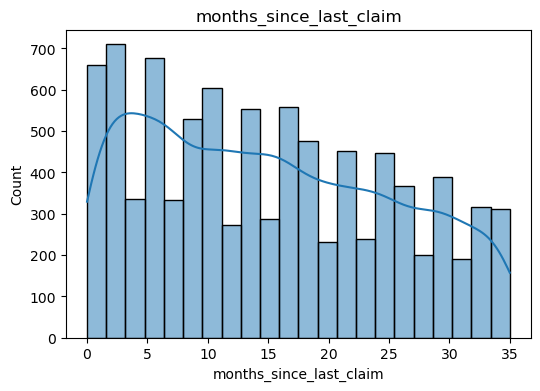

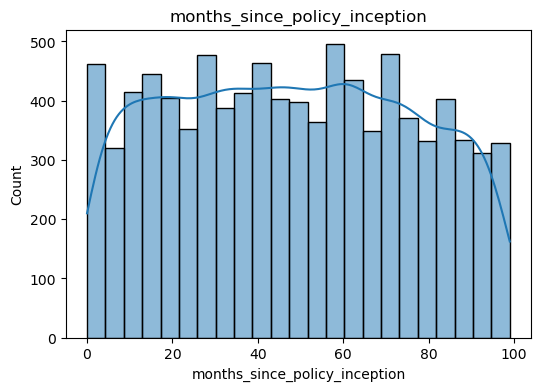

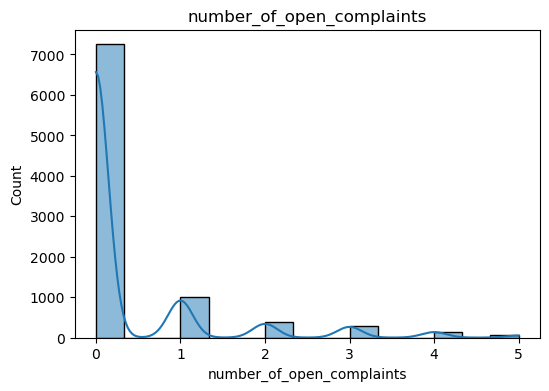

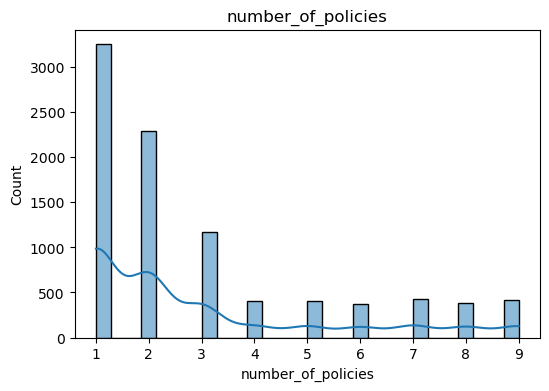

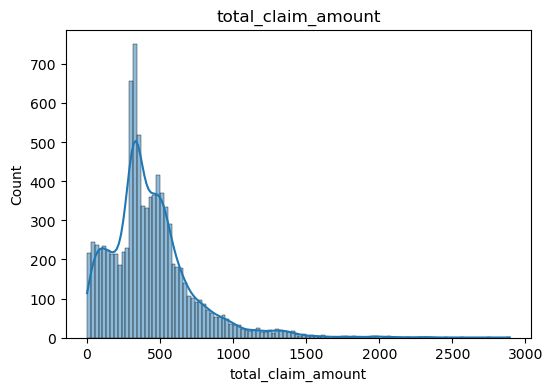

In [12]:
# Here we can see the distribution of the numerical columns with a histogram
for col in numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

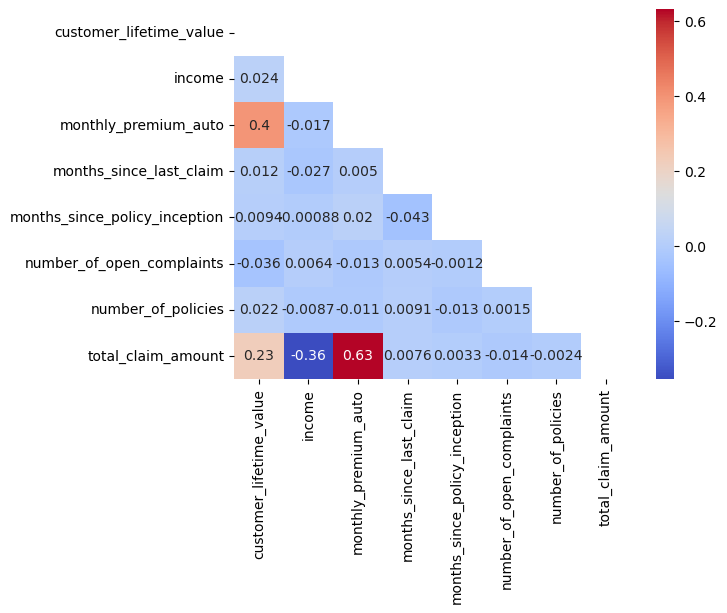

In [13]:
# We use a heatmap to see the correlation between the variables, masking the repeated values
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [14]:
# Drop unnecessary columns from the numerical columns and round to two decimal places
numerical = numerical.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)
numerical = numerical.round(2)
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.52,56274,69,384.81
1,6979.54,0,94,1131.46
2,12887.43,48767,108,566.47
3,7645.86,0,106,529.88
4,2813.69,43836,73,138.13
...,...,...,...,...
9129,23405.99,71941,73,198.23
9130,3096.51,21604,79,379.20
9131,8163.89,0,85,790.78
9132,7524.44,21941,96,691.20


In [15]:
# Drop unnecessary columns from the categorical 
categorical = categorical.drop(['customer', 'response', 'education', 'marital_status', 'renew_offer_type', 'sales_channel', 'effective_to_date', 'policy'], axis=1)
categorical

,state,coverage,employmentstatus,gender,location_code,policy_type,vehicle_class,vehicle_size
0,Washington,Basic,Employed,F,Suburban,Corporate Auto,Two-Door Car,Medsize
1,Arizona,Extended,Unemployed,F,Suburban,Personal Auto,Four-Door Car,Medsize
2,Nevada,Premium,Employed,F,Suburban,Personal Auto,Two-Door Car,Medsize
3,California,Basic,Unemployed,M,Suburban,Corporate Auto,SUV,Medsize
4,Washington,Basic,Employed,M,Rural,Personal Auto,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...
9129,California,Basic,Employed,M,Urban,Personal Auto,Four-Door Car,Medsize
9130,California,Extended,Employed,F,Suburban,Corporate Auto,Four-Door Car,Medsize
9131,California,Extended,Unemployed,M,Suburban,Corporate Auto,Four-Door Car,Medsize
9132,California,Extended,Employed,M,Suburban,Personal Auto,Four-Door Car,Large


## Processing Data

Dealing with outliers

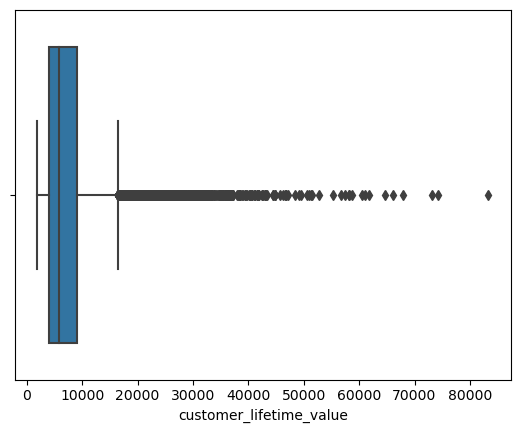

In [16]:
# We can visualize the distribution of the customer lifetime value using a boxplot
sns.boxplot(df['customer_lifetime_value'])
plt.show()

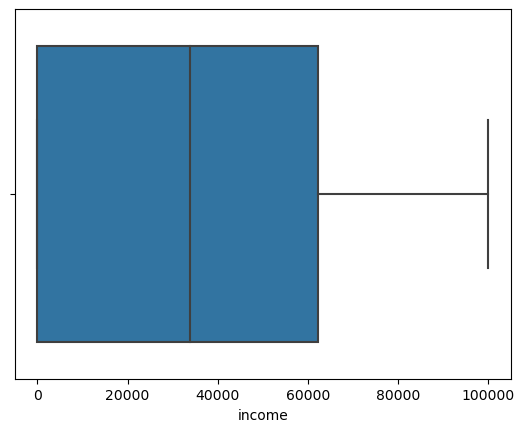

In [17]:
# Here we see the distribution of the income column with a boxplot
sns.boxplot(df['income'])
plt.show()

In [18]:
# Here we identify the outliers in "customer_lifetime_value"
Q1 = np.percentile(df['customer_lifetime_value'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['customer_lifetime_value'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
outliers = df[(df['customer_lifetime_value'] > upper_limit) | (df['customer_lifetime_value'] < lower_limit)]
print(f"Number of outliers in the 'customer_lifetime_value' column: {len(outliers)}")

Number of outliers in the 'customer_lifetime_value' column: 817


In [19]:
# We check for outliers "in income"
Q1 = np.percentile(df['income'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['income'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper_limit = Q3 +1.5 * IQR
outliers = df[(df['income'] > upper_limit) | (df['income'] < lower_limit)]
print(f"Number of outliers in the 'income' column: {len(outliers)}")

Number of outliers in the 'income' column: 0


In [20]:
# Removing outliers from "customer_lifetime_value"
df = df[(df['customer_lifetime_value'] <= upper_limit) & (df['customer_lifetime_value'] >= lower_limit)]

Normalization

In [21]:
# X Y split before normalizing
y = numerical["total_claim_amount"]
X = numerical.drop("total_claim_amount", axis=1)

In [22]:
# We normalize the numerical columns
scaler = MinMaxScaler()
num_norm = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)

Encoding Categorical Data

In [23]:
# Convert the categorical columns into numerical columns
categorical_dumm = pd.get_dummies(categorical)

In [24]:
# We concatenate the numerical and categorical dataframes
X_num_cat = pd.concat([num_norm, categorical_dumm], axis=1)

Splitting into train set and test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

6393 6393
2741 2741


## Modeling

Apply model

In [43]:
# We apply the Linear Regression on the training data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
# Predictions of the total claim amount on the testing data
predict = model.predict(X_test)
predict

array([1058.47066022,  446.19535366,  509.64317098, ...,  341.19489219,
        504.18594152,  525.22519961])

## Model Validation

In [45]:
r2 = r2_score(y_test, predict)
RMSE = mean_squared_error(y_test, predict, squared=False)
MSE = mean_squared_error(y_test, predict)
MAE = mean_absolute_error(y_test, predict)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.5259737600574148
RMSE =  197.50485873728607
MSE =  39008.16922483532
MAE =  142.72393976799816


In [29]:
y.describe()

count    9134.000000
mean      434.088834
std       290.500043
min         0.100000
25%       272.260000
50%       383.945000
75%       547.515000
max      2893.240000
Name: total_claim_amount, dtype: float64